In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GQLEQELAALDQEIAAAEQELAALDWQIQG', 'GQIQWKLAARRQKLAAIRQKLAARRQKLQG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['c'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 205.6]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max     
0  	72   	-865.581	27.972	-928.044	-815.808
1  	78   	-884.248	16.8094	-928.044	-848.802
2  	64   	-893.73 	11.5687	-928.044	-873.067
3  	52   	-900.427	12.2346	-932.493	-885.029
4  	76   	-908.425	13.2697	-932.493	-892.67 
5  	77   	-921.27 	9.64335	-936.305	-900.752
6  	66   	-928.198	3.38728	-936.305	-921.25 
7  	51   	-930.916	2.65043	-936.305	-926.154
8  	88   	-933.427	1.91679	-936.346	-930.367
9  	63   	-935.066	1.16032	-936.586	-932.234
10 	79   	-936.079	0.438142	-936.655	-935.041
11 	73   	-936.37 	0.194991	-936.696	-935.88 
12 	72   	-936.54 	0.0960885	-936.736	-936.342
13 	87   	-936.605	0.0643044	-936.752	-936.489
14 	65   	-936.653	0.0516989	-936.762	-936.567
15 	74   	-936.683	0.044673 	-936.762	-936.602
16 	64   	-936.702	0.0358994	-936.776	-936.643
17 	85   	-936.724	0.0303937	-936.796	-936.675
18 	74   	-936.738	0.0311777	-936.796	-936.692
19 	73   	-936.75 	0.0271587	-936.797	-936.701
20 	64   	-936.758	0.0248314	-936.798	-

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-936.7984159829607

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

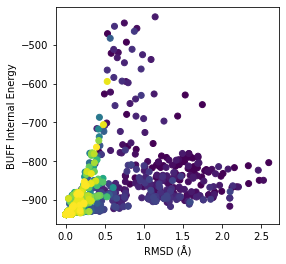

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('d_apCC-Di-AB-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	100  	-854.131	36.4886	-926.57	-717.078
1  	100  	-871.791	25.4526	-926.57	-819.813
2  	100  	-880.854	22.8477	-926.57	-831.699
3  	100  	-889.239	20.46  	-926.57	-831.699
4  	100  	-895.344	18.518 	-933.228	-848.668
5  	100  	-903.026	15.933 	-934.091	-854.29 
6  	100  	-906.998	14.1072	-934.091	-857.844
7  	100  	-911.398	11.595 	-934.091	-883.633
8  	100  	-915.078	10.1812	-934.091	-889.865
9  	100  	-918.503	8.34028	-934.091	-893.043
10 	100  	-921.44 	7.00773	-934.091	-899.723
11 	100  	-923.75 	6.32247	-936.233	-905.706
12 	100  	-926    	5.19295	-936.233	-909.858
13 	100  	-927.956	4.27781	-936.233	-914.109
14 	100  	-929.737	3.62454	-936.233	-919.644
15 	100  	-931.144	3.31154	-936.453	-922.436
16 	100  	-932.662	2.82465	-936.453	-924.995
17 	100  	-933.902	2.12756	-936.492	-928.123
18 	100  	-934.815	1.59466	-936.492	-928.763
19 	100  	-935.349	1.12857	-936.492	-929.104
20 	100  	-935.803	0.707193	-936.586	-931.279
21 	100  	-936

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-937.0651340047456

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

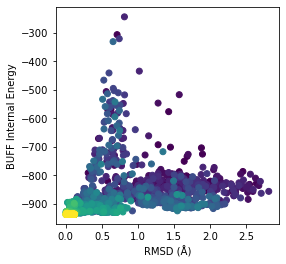

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('d_apCC-Di-AB-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-812.881	95.2054	-935.787	-307.442
1  	88   	-832.371	91.4473	-924.227	-476.595
2  	52   	-857.333	91.2913	-924.855	-476.595
3  	33   	-847.599	82.8391	-924.855	-509.219
4  	79   	-834.903	79.1363	-924.855	-509.219
5  	88   	-850.67 	61.9023	-924.802	-617.839
6  	75   	-850.198	105.227	-928.519	-202.994
7  	50   	-841.942	94.014 	-924.802	-202.994
8  	51   	-851.515	58.6146	-929.284	-548.99 
9  	86   	-846.904	103.782	-932.967	-29.6717
10 	62   	-864.836	90.779 	-932.967	-29.6717
11 	53   	-864.096	45.4936	-932.967	-667.063
12 	61   	-850.718	63.4418	-928.332	-551.658
13 	73   	-861.213	39.4225	-928.332	-679.785
14 	63   	-870.588	32.3621	-932.503	-730.035
15 	58   	-799.725	167.281	-932.503	25.7329 
16 	72   	-764.331	195.514	-909.682	25.7329 
17 	69   	-778.133	175.924	-926.604	17.7099 
18 	75   	-824.65 	142.064	-917.429	17.7099 
19 	50   	-833.895	150.035	-918.605	17.7099 
20 	55   	-835.815	97.1219	-918.605	-221.791
21 	70   	

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-935.7869190916077

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

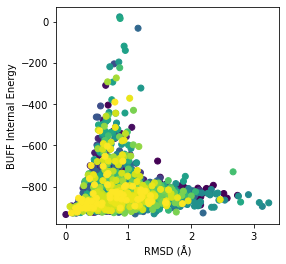

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('d_apCC-Di-AB-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max     
0  	100  	-821.079	39.285	-891.265	-641.542
1  	100  	-829.562	42.5357	-896.315	-585.303
2  	100  	-825.164	60.56  	-907.629	-607.423
3  	100  	-838.402	61.796 	-900.807	-585.931
4  	100  	-855.518	62.1283	-910.233	-593.724
5  	100  	-875.531	35.984 	-915.984	-687.635
6  	100  	-890.856	17.4365	-915.658	-806.916
7  	100  	-896.881	12.1913	-915.022	-848.275
8  	100  	-903.362	7.56739	-915.643	-876.541
9  	100  	-910.594	3.63773	-915.257	-896.169
10 	100  	-911.014	4.88749	-915.93 	-896.061
11 	100  	-912.412	4.80059	-915.966	-896.468
12 	100  	-910.582	6.36816	-916.189	-896.883
13 	100  	-911.83 	5.14645	-916.265	-897.909
14 	100  	-910.366	5.86083	-916.135	-897.862
15 	100  	-914.685	2.89163	-916.247	-904.901
16 	100  	-912.349	4.80909	-916.279	-898.708
17 	100  	-913.769	4.18489	-916.329	-904.835
18 	100  	-911.957	5.17113	-916.273	-904.753
19 	100  	-913.634	4.50903	-916.286	-904.706
20 	100  	-912.914	4.82537	-916.326	-904.664
21 	100  	-9

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-916.4885082489897

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

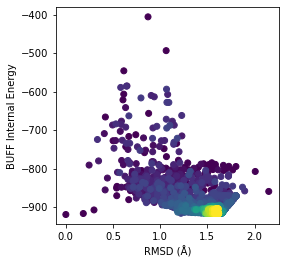

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('d_apCC-Di-AB-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)